# BACKGROUND

A taxi company operating in New York aims to enhance its customer service. To achieve this, they find it necessary to understand the performance of the taxi rental industry and assess customer satisfaction levels, particularly regarding the experience of using taxis in New York’s traffic conditions.

## PROBLEM STATEMENT

In the urban transportation industry, managing fares, travel time, and customer satisfaction are critical factors. Optimizing service efficiency, particularly in high-traffic areas and during peak hours, can enhance the customer experience and improve revenue management.

The company seeks to understand the impact of traffic congestion on customer satisfaction and identify potential opportunities for promotions, route optimization, or other strategies to enhance performance.

# IMPORTING CLEAN DATABASE

## Importing Important Libraries

In [1]:
import gdown
from io import BytesIO

In [2]:
# IMPORTING USEABLE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset To Workbook

Code to load the dataset from google drive link to the workbook

In [3]:
# Google Drive link
url = "https://drive.google.com/file/d/1MbrrE808O4nCmAlo2L-yYSE_dS5M1DRD/view?usp=drive_link"

# Extracting file ID from URL
# File ID usually between the /d and /

file_id = url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# TEMPORARY FILE

output_analysis = "temp_analysis_dataset.csv"

# SAVING FILE TO LOCAL DIRECTORY
gdown.download(download_url, output_analysis, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1MbrrE808O4nCmAlo2L-yYSE_dS5M1DRD
To: /content/temp_analysis_dataset.csv
100%|██████████| 7.19M/7.19M [00:00<00:00, 36.0MB/s]


'temp_analysis_dataset.csv'

In [4]:
# IMPORTING THE DATABASE

df = pd.read_csv(output_analysis)
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,11.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,9.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68030,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,2.0,1.0,0.0
68031,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,2.0,1.0,0.0
68032,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.0
68033,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.0
68034,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1.0,256,140,1,5.82,23.65,0.0,0.0,2.00,0.0,1.0,26.65,1.0,1.0,0.0


# ANALYSIS

## Passenger Statisfaction Check

One of the main point that the client want to understand is to check is there any correlation between the stuck in the traffic jam and the tip given

Before continue our further discussion, we need to check which data will be reflecting this

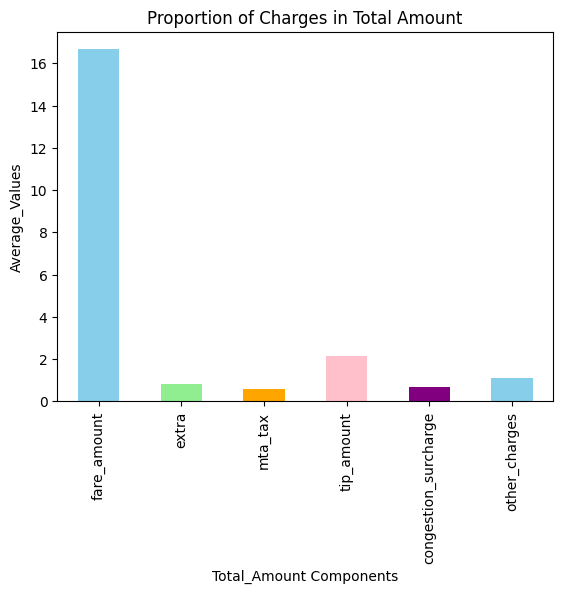

In [13]:
# CHECKING THE PROPORTION OF FARES IN TOTAL_AMOUNT

fare_components = df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'congestion_surcharge']]
fare_components['other_charges'] = df['total_amount'] - fare_components.sum(axis=1)

fare_components_mean = fare_components.mean()
fare_components_mean.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'orange', 'pink', 'purple'])
plt.title("Proportion of Charges in Total Amount")
plt.xlabel("Total_Amount Components")
plt.ylabel("Average_Values")
plt.show()

Text(0, 0.5, 'Percentage (%)')

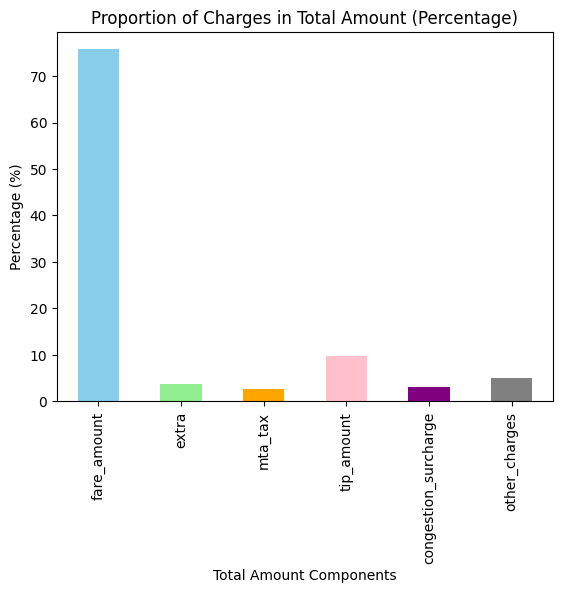

In [15]:
# FARE COMPONENTS
fare_components = df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'congestion_surcharge']]
fare_components['other_charges'] = df['total_amount'] - fare_components.sum(axis=1)

# AVERAGE VALUE FOR EACH COMPONENTS
fare_components_mean = fare_components.mean()

# CHANGE THE AVERAGE VALUE BECOME PERCENTAGE OF CONTRIBUTION
fare_components_percentage = (fare_components_mean / fare_components_mean.sum()) * 100

# Plot PERCENTAGE FOR EACH COMPONENTS
fare_components_percentage.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink', 'purple', 'grey'])
plt.title("Proportion of Charges in Total Amount (Percentage)")
plt.xlabel("Total Amount Components")
plt.ylabel("Percentage (%)")

From the chart, we can observe that ***congestion_surcharge and tip_amount contribute quite significant*** to taxi industry income, with average percentange within 20%

Congestion surcharge and tip amount also can be used to answer the question, does the traffic jam will impact the passenger statisfactory.

Since congestion_surcharge given in the heavy traffic conditions, and tip_amount reflect the statisfactory, the more statisfied the passenger the more likely they will give tip

Before checking the relation between these two variables, we consider few things :



*   We will focus on the frequency of surcharge and frequency of tip given

*   We can't directly use the number of tip or number of surcharge, since the surcharge is categorical based on the type of vehicle




---





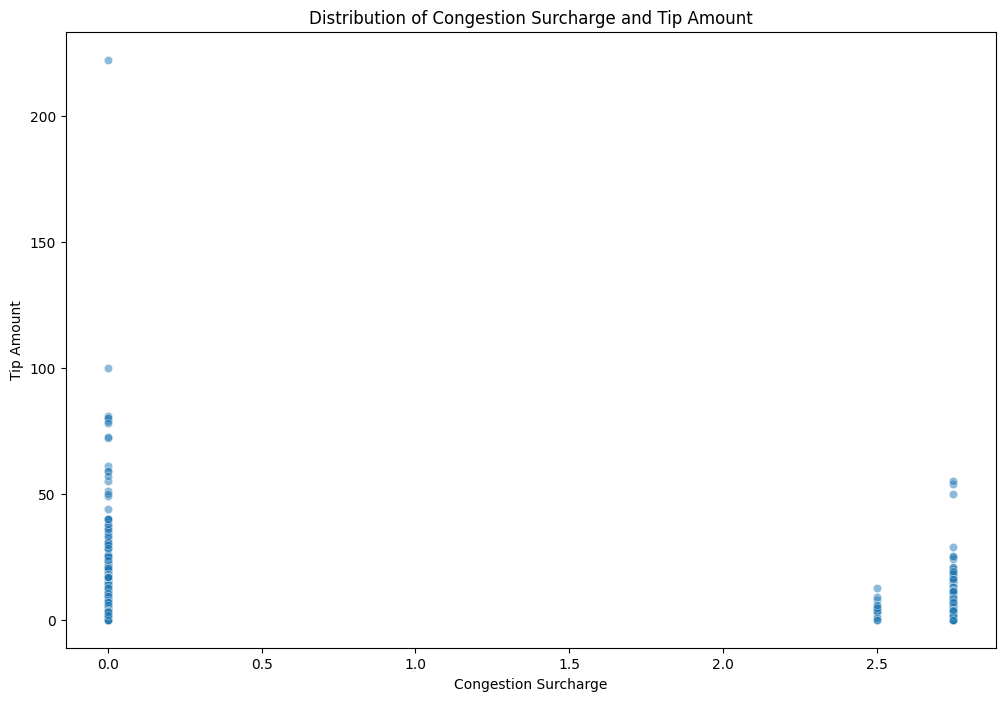

In [17]:
# VISUALISE THE DISTRIBUTION OF SURCHARGE AND AMOUNT



plt.figure(figsize=(12, 8))
sns.scatterplot(x='congestion_surcharge', y='tip_amount', data=df, alpha=0.5)
plt.title("Distribution of Congestion Surcharge and Tip Amount")
plt.xlabel("Congestion Surcharge")
plt.ylabel("Tip Amount")


plt.show()

Since the distribution is not normally distributed, we will use spearmen to check the correlation of frequency between tip_amount and congestion_surcharge

In [21]:
from scipy.stats import  spearmanr

# Calculate the frequency of surcharge (1 if with surcharge, 0 if no surcharge)
df['surcharge_freq'] = df['congestion_surcharge'].apply(lambda x: 1 if x > 0 else 0)

# Calculate the frequency of tip (1 if with tip, 0 if no tip)
df['tip_freq'] = df['tip_amount'].apply(lambda x: 1 if x > 0 else 0)



# Calculate Spearman correlation between congestion surcharge frequency dan tip frequency
spearman_corr, spearman_pval = spearmanr(df['surcharge_freq'], df['tip_freq'])

print(f"Spearman Correlation (Surcharge vs. Tip Frequency): {spearman_corr:.3f}, p-value: {spearman_pval:.3f}")

Spearman Correlation (Surcharge vs. Tip Frequency): 0.231, p-value: 0.000


The spearmen correlation suggest that t**here's strong interaction between giving tip and stuck in the traffic jam.**

*The correlation is positive*, where when there's increase in the traffic, passenger still give tip.

*This quite opposite of our hypothesis where because of traffic jam, passenger tend to not give the tip*

HOWEVER,


*   When analyzing the data, we must be aware that, there's possibility even with no traffic jam (no congestion surcharge), some passengers still don't give the tip.

*   We need to see the frequency in more detail. Below is the distribution in heatmap plot (contingency table)



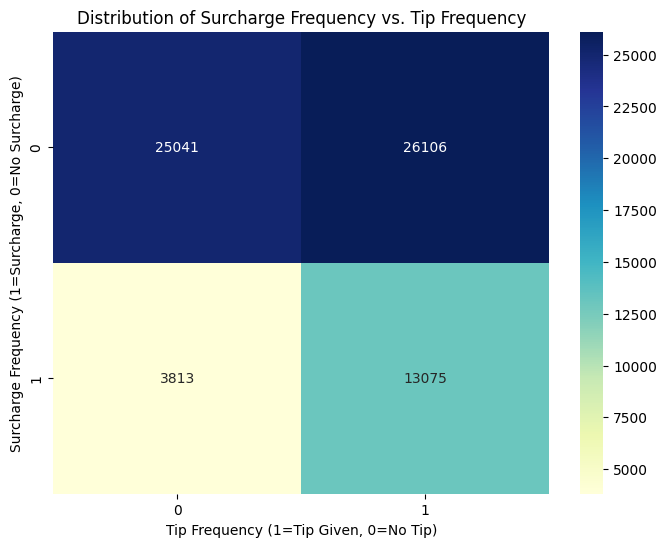

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculates surcharge frequency (1 if there is a surcharge, 0 if not)
df['surcharge_freq'] = df['congestion_surcharge'].apply(lambda x: 1 if x > 0 else 0)

# Calculates the frequency of tipping (1 if there is a tip, 0 if not)
df['tip_freq'] = df['tip_amount'].apply(lambda x: 1 if x > 0 else 0)

# Create a contingency table to calculate the transaction amount based on a combination of surcharge and tip
contingency_table = pd.crosstab(df['surcharge_freq'], df['tip_freq'])

# Create a heatmap from the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel('Tip Frequency (1=Tip Given, 0=No Tip)')
plt.ylabel('Surcharge Frequency (1=Surcharge, 0=No Surcharge)')
plt.title('Distribution of Surcharge Frequency vs. Tip Frequency')
plt.show()

We can ignore the 1st quadrant since this quadrant shows the frequency of peaple who don't give tip eventhough they don't face traffic jam (no surcharge).

We will focus on the 2nd to 4rd quadrant.



***From the 4th quadrant, we can see the number of people who trap in traffic jam and not giving tip, is significantly larger than the others***

***This indicates : when passengers stuck in the traffic jam, they will less likely give the tip, reflecting their distatisfactory.***

Hence proofing our first hypothesis

**WHAT CAN WE DO TO HELP IMPROVING THE CUSTOMER STATISFACTION ?**

## TIME vs TYPE OF PAYMENT

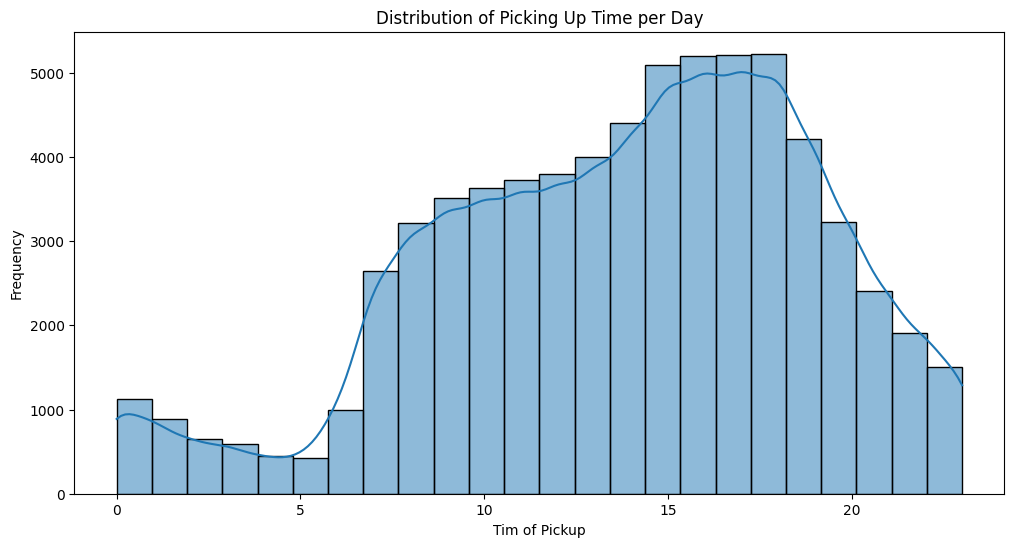

In [25]:
#IDENTIFYING THE PEAK PERIODS
df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(df['pickup_hour'], bins=24, kde=True)
plt.title("Distribution of Picking Up Time per Day")
plt.xlabel("Tim of Pickup")
plt.ylabel("Frequency")
plt.show()

Before going futher, we must know what time usually the taxi order peak

From the chart, we can see that the people mobility during the *morning (8-10) and afternoon (15-18)*


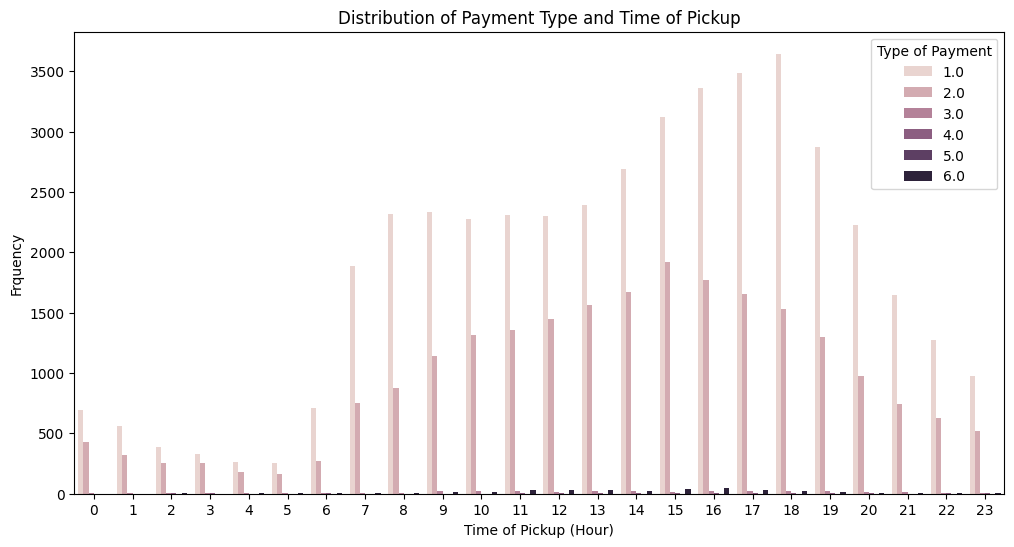

In [26]:
# Distribution of payment type with time of pickup

#df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour

plt.figure(figsize=(12, 6))

sns.countplot(x='pickup_hour', hue='payment_type', data=df)

plt.title("Distribution of Payment Type and Time of Pickup")

plt.xlabel("Time of Pickup (Hour)")

plt.ylabel("Frquency")

plt.legend(title="Type of Payment")

plt.show()


*   From the distribution chart, we can see that both Credit Card (1) and Cash (2) are the biggest payment type

*   Both payment usage increase within bussy hour (start from 14'0 clock to 19'0 clock)

*   However, we observe that the usage of creadit card (1) spiking more significantly compared to cash

*   This is a period range where people have increasing mobility, people buying lunch, attending meeting and commuting home.


*   Credit card payment offers flexibile and faster time when paying the fares









https://jknylaw.com/blog/worst-traffic-times-in-new-york-city/

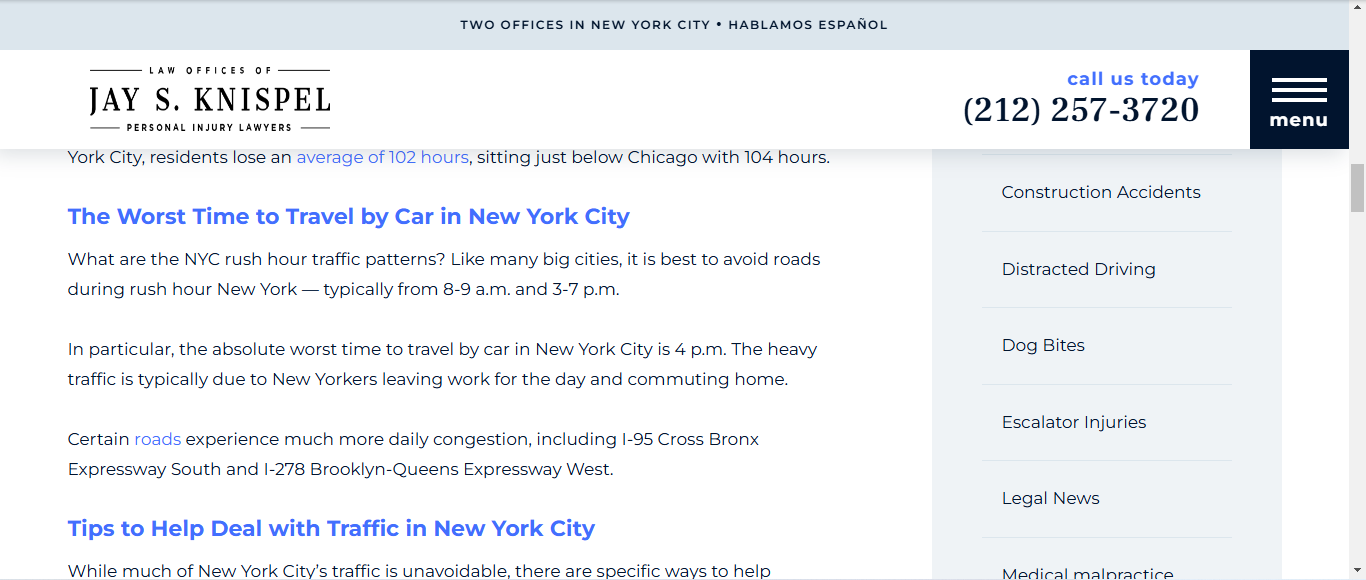

Based on the payment system, we propose several solutions to increase passenger statisfaction :



1.   Increasing the number of credit payment system in our vehicles for practicality and saving time during rush hour
2.   Consider to use QR Code payment




QR Code usage currently emergin in the US with many stores and industry try to utilize this code simplicity and cost-effectiveness

https://www.uniqode.com/blog/qr-code-insights/qr-code-usage-united-states

This solution also can help to catter people who don't have credit card but want the quick/time saving payment



Utilizing credit card and QR Code payment may help to save time and increase the statisfaction

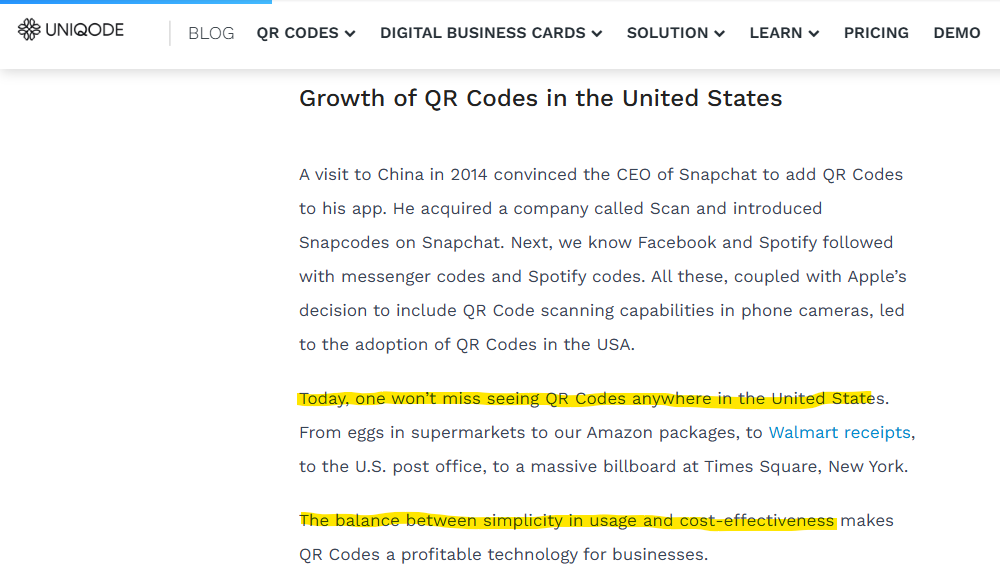

## Trip Duration (in Minutes) vs Pick Up and Drop Off Location

We will check how long in average the taxi users will get to their destination based on their current pickup location.



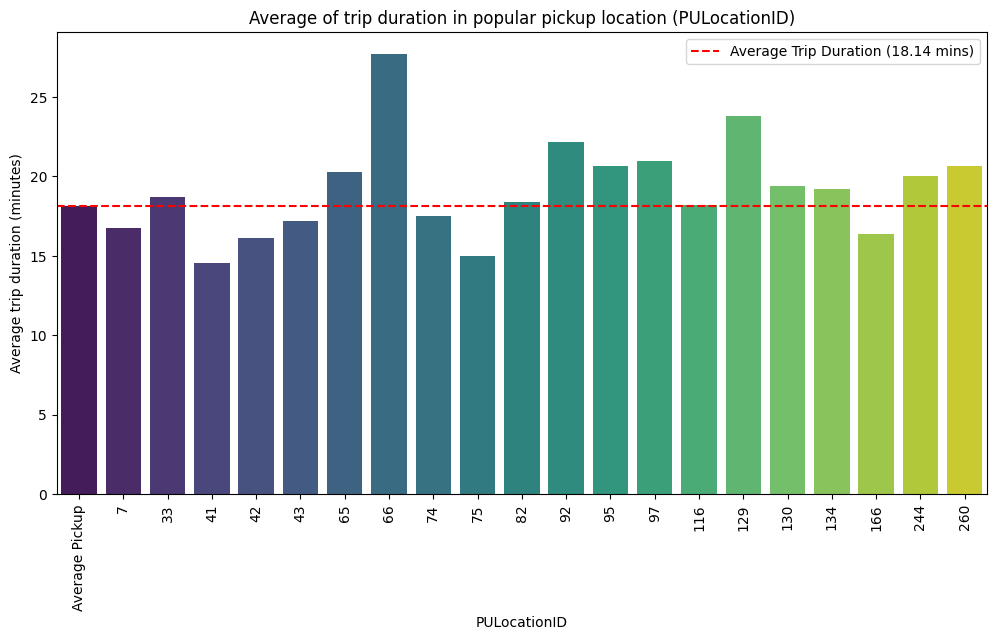

In [28]:
# Calculate the average of trip duration
df['trip_duration'] = (pd.to_datetime(df['lpep_dropoff_datetime']) - pd.to_datetime(df['lpep_pickup_datetime'])).dt.total_seconds() / 60

# Counting frequency of PULocationID and chose the highest frequency
top_pu_locations = df['PULocationID'].value_counts().nlargest(20).index
frequent_areas = df[df['PULocationID'].isin(top_pu_locations)]

# Calculating the average of trip duration for top frequent pickup locations
avg_duration_top_locations = frequent_areas.groupby('PULocationID')['trip_duration'].mean().reset_index()

# Calculating the average trip duration
# This average value will be used to see the over index or under index

avg_pickup_duration = df['trip_duration'].mean()

# Adding average trip duration to overall data
avg_duration_with_pickup = pd.concat([
    pd.DataFrame({'PULocationID': ['Average Pickup'], 'trip_duration': [avg_pickup_duration]}),
    avg_duration_top_locations
], ignore_index=True)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='trip_duration', data=avg_duration_with_pickup, palette="viridis")
plt.title("Average of trip duration in popular pickup location (PULocationID)")
plt.xlabel("PULocationID")
plt.ylabel("Average trip duration (minutes)")
plt.xticks(rotation=90)

plt.axhline(y=avg_pickup_duration, color='red', linestyle='--', linewidth=1.5, label=f"Average Trip Duration ({avg_pickup_duration:.2f} mins)")
plt.legend()

plt.show()


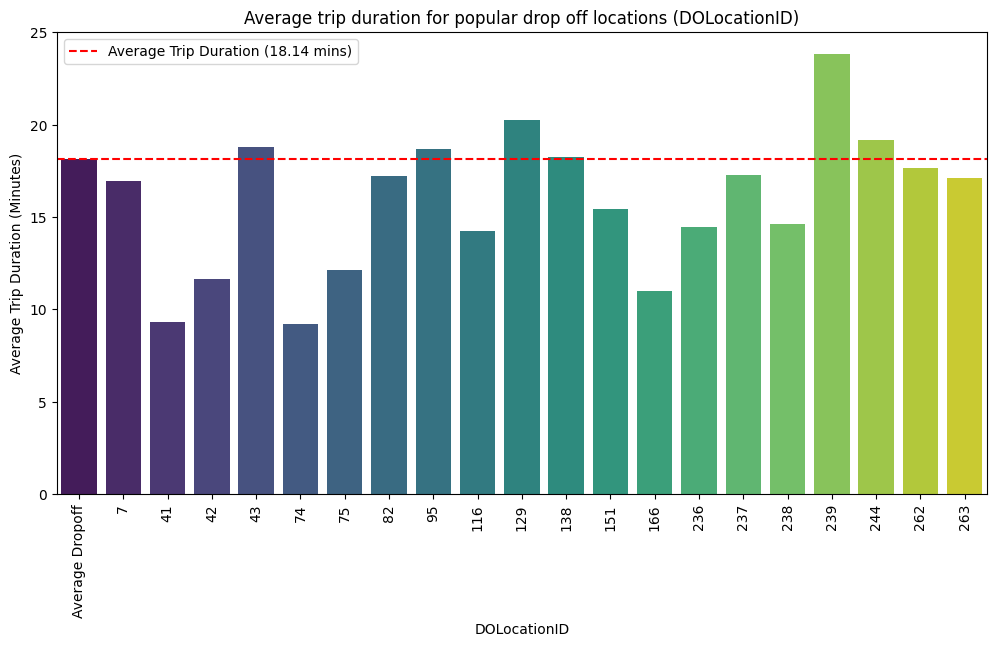

In [30]:
# Calculating average trip duration
df['trip_duration'] = (pd.to_datetime(df['lpep_dropoff_datetime']) - pd.to_datetime(df['lpep_pickup_datetime'])).dt.total_seconds() / 60

# Counting frequency of DOLocationID and choosing the highest frequency - finding out the popular drop locations
top_do_locations = df['DOLocationID'].value_counts().nlargest(20).index
frequent_areas = df[df['DOLocationID'].isin(top_do_locations)]

# Calculating average trip duration for popular drop locations
avg_duration_top_locations = frequent_areas.groupby('DOLocationID')['trip_duration'].mean().reset_index()

# Counting average of trip duration
avg_dropoff_duration = df['trip_duration'].mean()

# Adding the average trip duration to the data
avg_duration_with_dropoff = pd.concat([
    pd.DataFrame({'DOLocationID': ['Average Dropoff'], 'trip_duration': [avg_dropoff_duration]}),
    avg_duration_top_locations
], ignore_index=True)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='DOLocationID', y='trip_duration', data=avg_duration_with_dropoff, palette="viridis")
plt.title("Average trip duration for popular drop off locations (DOLocationID)")
plt.xlabel("DOLocationID")
plt.ylabel("Average Trip Duration (Minutes)")
plt.xticks(rotation=90)

# Adding horizontal line for average duration
plt.axhline(y=avg_dropoff_duration, color='red', linestyle='--', linewidth=1.5, label=f"Average Trip Duration ({avg_dropoff_duration:.2f} mins)")
plt.legend()

plt.show()

From the chart we can see several areas over indexed to average trip duration.

Over indexed areas means, the user that order the taxi from or to the certain areas will be more susceptible to feel unconfortable trapped in the traffic jam.



*   The over indexed pickup area that more likely exeprience traffic jam are : 65
66*
92
95
97
129*
130
134
244
260

*   The over indexed drop area that more likely experience traffic jam are :
43
95
129
239
244





Other metod to help increasing the customer's statisfaction is through wise routing



*   Avoid driving through the heavy traffic areas (as mentioned abov) during rush hour
*   If not avoidable (like it's the passengers' current position, their drop off point or should drive through those areas), consider to provide treats (like snack to increase passenger's mood) or consider slight price cut



## Distribution of Frequency and Hour, for each day in a week

Based on pervious information.

If we want to give treats or price discount, when we will do it ?

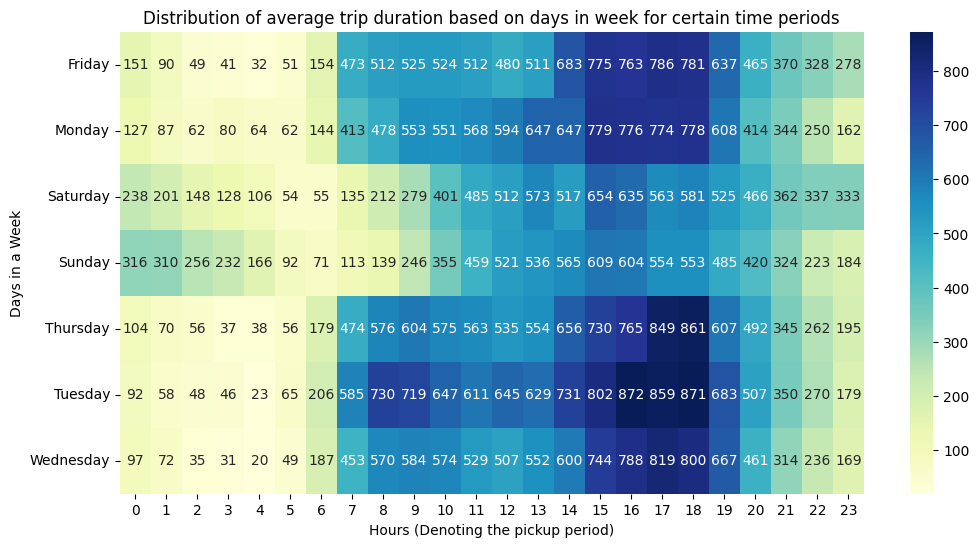

In [34]:
df['pickup_day'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.day_name()
df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour

# Heatmap for days and hour
trip_counts = df.groupby(['pickup_day', 'pickup_hour']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(trip_counts, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribution of average trip duration based on days in week for certain time periods")
plt.xlabel("Hours (Denoting the pickup period)")
plt.ylabel("Days in a Week")
plt.show()

From the heatmap we can see for most of the weekdays, Tue - Thursday, the trend start to increase in 15 and reach the peak at 17 - 18 afternoon and started to slowing down again in 18 - 19

However, in Monday and Friday, the trend started early. The frequency started to increase 13 - 14 afternoon.

This can be understood because in Monday people are preparing for the first day of the week, and in Friday, people will enjoy weekend

**Consider to give treats or price discount from 15 - 18 in Tuesda - Thursday, and earlier (13 - 18) in Monday and Tuesday.**

This can help to boost happiness and statisfaction of the passengers

If the company chose to use the price cut.


But, what is the threshold for us to decide when will the discout applied ?

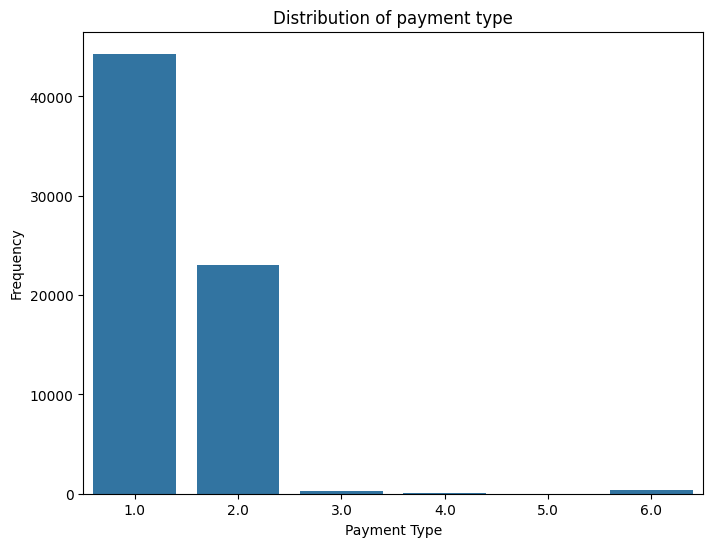

Average of Payment based on type:
payment_type
1.0    17.137563
2.0    15.943759
3.0     8.126625
4.0     7.175806
5.0    14.000000
6.0    13.865268
Name: fare_amount, dtype: float64


In [35]:
# DISTRIBUTION OF PAYMENT TYPE AND AVERAGE PAYMENT MOUNT
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data = df)
plt.title("Distribution of payment type")
plt.xlabel("Payment Type")
plt.ylabel("Frequency")
plt.show()

avg_fare_by_payment = df.groupby('payment_type')['fare_amount'].mean()
print("Average of Payment based on type:")
print(avg_fare_by_payment)

When applying the discount, we can applied them if the fare (calculated based on the trip distance, not the total amount) is more than the average (withi 16 - 18 USD)

## Ratecode, Fare and Trip Distance

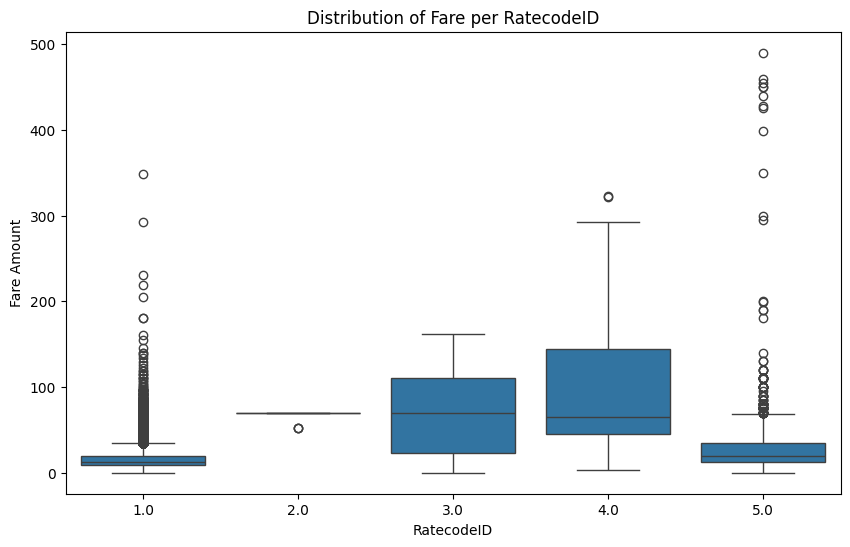

In [39]:
# DISTRIBUTION OF FARE AMOUNT PER RATECODEID
plt.figure(figsize=(10, 6))
sns.boxplot(x='RatecodeID', y='fare_amount', data=df)
plt.title("Distribution of Fare per RatecodeID")
plt.xlabel("RatecodeID")
plt.ylabel("Fare Amount")
plt.show()

In [40]:
fare_by_ratecode = df.groupby('RatecodeID')['fare_amount'].mean()
print("Average Fare per RatecodeID:")
print(fare_by_ratecode)

Average Fare per RatecodeID:
RatecodeID
1.0    16.153091
2.0    69.653846
3.0    67.792353
4.0    95.492982
5.0    29.455453
Name: fare_amount, dtype: float64


*Insights :*

**When the destination is to Airport, the average fare tend to be higher compared to the regular destination (standard rate).**



*While the fare for regular ones, expected to be varies since the variable dependent on the distance of the trip*

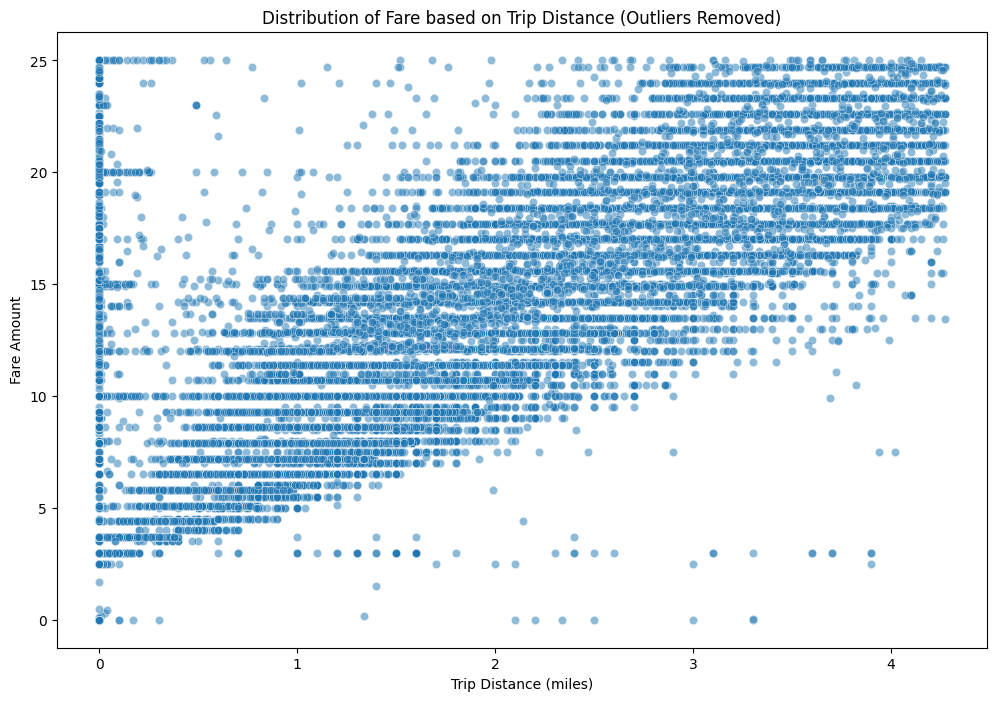

In [41]:
# DISTRIBUTION OF FARE vs DISTANCE TRIP

# limiting the data so will not include the distance outlier

trip_distance_q1 = df['trip_distance'].quantile(0.25)
trip_distance_q3 = df['trip_distance'].quantile(0.75)
trip_distance_iqr = trip_distance_q3 - trip_distance_q1

trip_distance_bottom_limit = trip_distance_q1 - 1.5 * trip_distance_iqr
trip_distance_top_limit = trip_distance_q1 + 1.5 * trip_distance_iqr

fare_q1 = df['fare_amount'].quantile(0.25)
fare_q3 = df['fare_amount'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1

fare_bottom_limit = fare_q1 - 1.5 * fare_iqr
fare_top_limit = fare_q1 + 1.5 * fare_iqr

df_filtered = df[(df['trip_distance'] > trip_distance_bottom_limit) & (df['trip_distance'] < trip_distance_top_limit) & (df['fare_amount'] > fare_bottom_limit) & (df['fare_amount'] < fare_top_limit)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, alpha=0.5)
plt.title("Distribution of Fare based on Trip Distance (Outliers Removed)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")

plt.show()


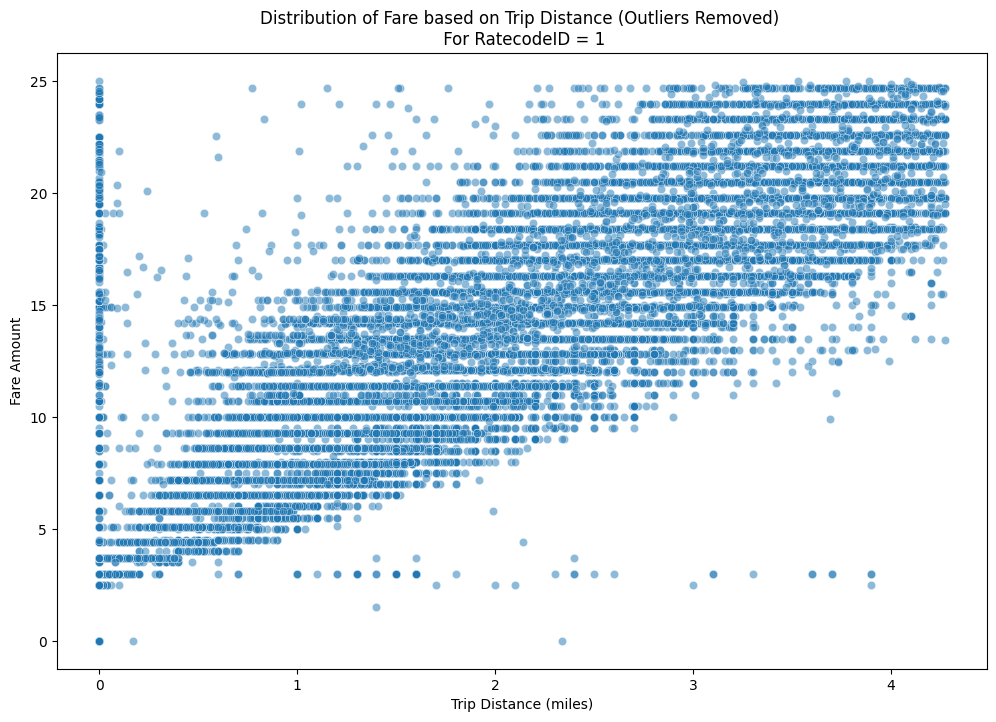

In [42]:
# DISTRIBUTION OF FARE vs DISTANCE TRIP FOR RATECODE 1

rate1 = df_filtered[df_filtered['RatecodeID'] == 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=rate1, alpha=0.5)
plt.title("Distribution of Fare based on Trip Distance (Outliers Removed) \n For RatecodeID = 1")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")


plt.show()

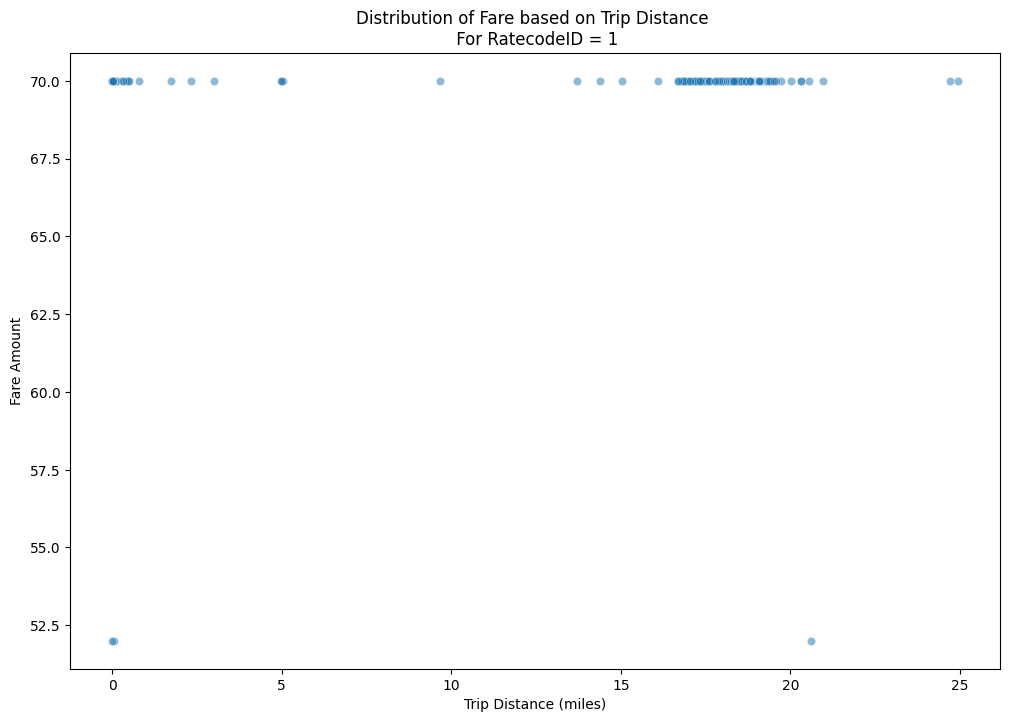

In [51]:
# DISTRIBUTION OF FARE vs DISTANCE TRIP FOR RATECODE 2


rate2 = df[df['RatecodeID'] == 2]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=rate2, alpha=0.5)
plt.title("Distribution of Fare based on Trip Distance \n For RatecodeID = 1")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")


plt.show()

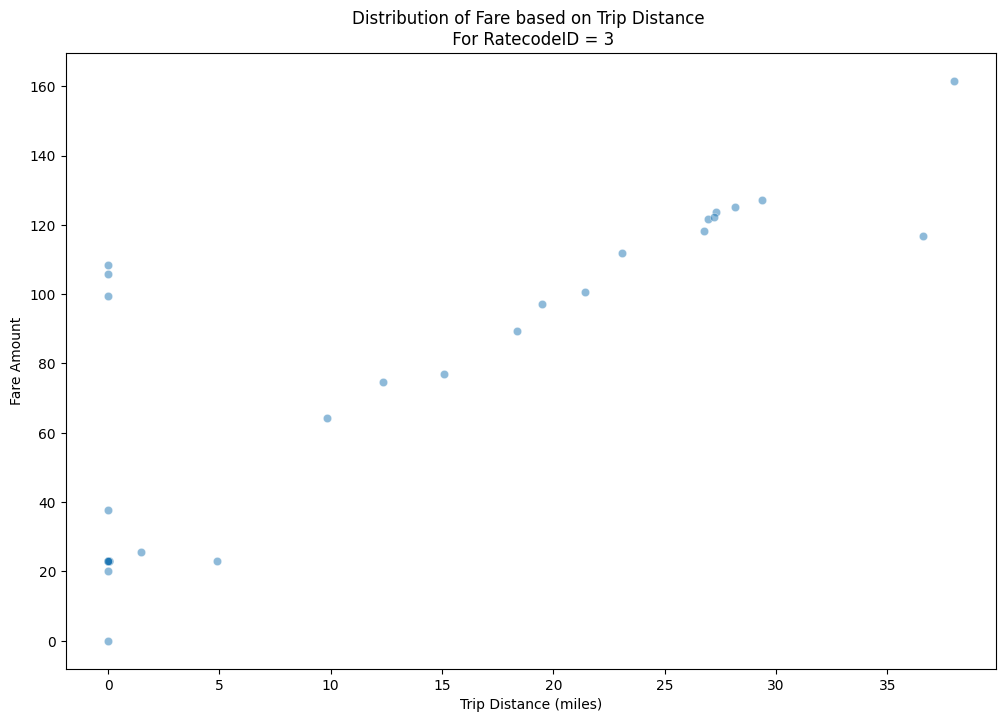

In [50]:
# DISTRIBUTION OF FARE vs DISTANCE TRIP FOR RATECODE 3

rate3 = df[df['RatecodeID'] == 3]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=rate3, alpha=0.5)
plt.title("Distribution of Fare based on Trip Distance \n For RatecodeID = 3")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")


plt.show()

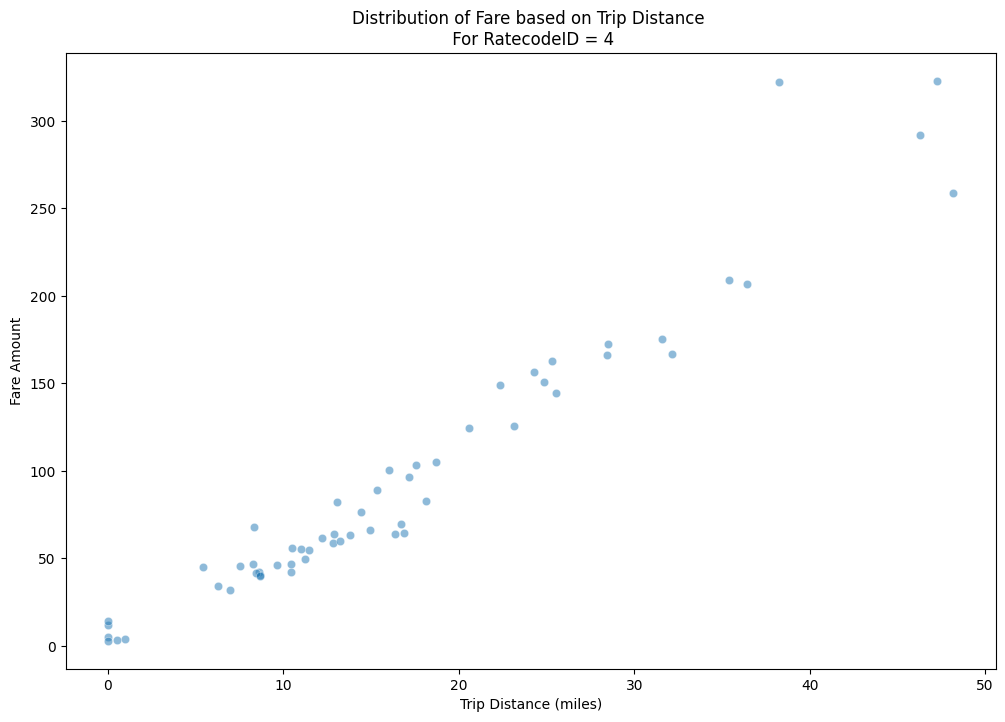

In [49]:
# DISTRIBUTION OF FARE vs DISTANCE TRIP FOR RATECODE 4

rate4 = df[df['RatecodeID'] == 4]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=rate4, alpha=0.5)
plt.title("Distribution of Fare based on Trip Distance \n For RatecodeID = 4")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")


plt.show()

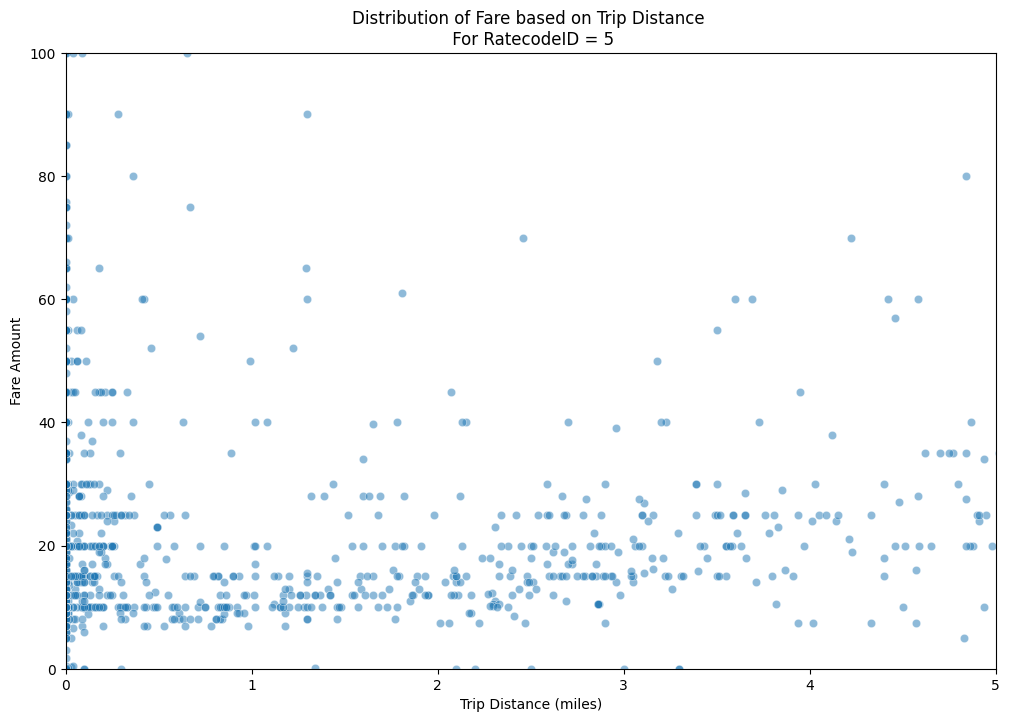

In [48]:
# DISTRIBUTION OF FARE vs DISTANCE TRIP FOR RATECODE 5

#rate5 = df_filtered[df_filtered['RatecodeID'] == 5]

rate5 = df[(df['RatecodeID'] == 5)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=rate5, alpha=0.5)
plt.title("Distribution of Fare based on Trip Distance \n For RatecodeID = 5")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")

plt.xlim(0, 5)
plt. ylim (0 , 100)
plt.show()

Based on distribution, the overall distribution (distance vs ratecode) skewed to ratecode = 1, thus we can eliminate outlier within this ratecode

However, for other rate code, since these ratecodes related to larger distance and higher fare, we use the total database

Based on the data, we can observe that :


1.   Most of relatively short distance transport use standard rate, with most of distance are within 4 - 5 Miles with fare around 25 USD.
2.   While for JFK (ratecode 2) the fare are fixed regardless the distance.
3. The other ratecode (3, 4) usually for traveling to Newark, Nassau or Westchester, for longer distance
4. The negotiated fare (ratecode 5) determined by the agreed values, hence we can't see strong trend


***We can cosider to give special discount for trip to airports during rush hours***

Considering the distance and price that also higher compared to standard commutes, this initiative may help promote more statisfaction

# CONCLUSION

Traffic jam impacting the passenger's statisfaction

Several Methods to Incresae